In [1]:
import scanpy as sc
import sys
sys.path.append('/wsfish/glioblastoma/')
import FISHspace as sp
from scipy.spatial import KDTree
import numpy as np
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

2023-07-24 16:56:17.857759: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
adata = sc.read_h5ad('../EEL_AnnData/EEL_41CleanNuclei-CellularNgh_FeaturesMN_ImmuneAnnotated2.h5ad')

#adata = sc.read_h5ad('../EEL_AnnData/EEL_41CleanNuclei-CellularNgh_FeaturesMN.h5ad')

In [3]:
palette = {
    'AC-like 1':'#2ecc71',#inchworm B4FF9F
    'AC-like 2':'#2ecc71',#inchworm B4FF9F
    
    # AC-like 3, MN33 very noisy for NN analysis
    'AC-like 3':'#2ecc71',#inchworm B4FF9F
    'AC-like 4':'#2ecc71',#inchworm B4FF9F
    'AC-like 5':'#2ecc71',#inchworm B4FF9F
    'AC-like 6':'#2ecc71',#inchworm B4FF9F
    'AC-like 7':'#2ecc71',#inchworm B4FF9F
    'AC-like 8':'#2ecc71',#inchworm B4FF9F

    'preOPC-like 1':'#7befb2',#'#c2f970'

    'MES-like 2': '#EDE8F3',
    'MES-like 3': '#E2D8EA',
    'MES-like 1': '#D6BEDD',
    'MES-like 5': '#CFA8D1',
    'MES-like 4': '#CA90C5',
    'MES-like 7': '#D873B6',
    'MES-like 8': '#C50F53',
    'MES-like 6': '#840034',
        
    
    'NPC-like 1':'#FFF192',
    'NPC-like 2':'#FFF192',
    'NPC-like 3':'#FFF192',
    
    'RG 1':'#ff9470',
    'RG 2':'#ff9470',
    
    'OPC-like 1':'#89c4f4', #bright turquoise
    'OPC-like 2':'#89c4f4', #bright turquoise
    'OPC-like 3':'#89c4f4', #bright turquoise
    
    #'Endothelial':'#d5b8ff', #mauve
    'Endothelial 1':'#8c14fc',#'#d5b8ff', #mauve
    'Endothelial':'#8c14fc',#'#d5b8ff', #mauve
    'Mural cell': '#8c14fc',  #electric indigo
    'Mural cell 1': '#8c14fc',  #electric indigo
    'Mural': '#8c14fc',  #electric indigo
    
    'Fibroblast': '#fbe7ef',
    'FB-like 2': '#FF6EC7', #fff9de
    'FB-like 3': '#FF6EC7', #fff9de
     #'FB-like 1': '#FF6EC7', #fff9de

    'Mono 1': '#c8f7c5',#'#e6d9cb',#'#cdd1e4',#'#f4ede4',
    'Mono 2': '#FBFCFA',
    
    'TAM-MDM 1':'#e88474',#'#F5C9B0',
    'TAM-MDM 2':'#A94A54',
    
    'TAM-MDM 3':'#89c4f4',#'#95a5a6',#'#ecd9dd',
    'TAM-MDM 4':'#DC9D57',#'#A5765C',
    
    'TAM-BDM 1':'#e88474',#'#F5C9B0',
    'TAM-BDM 2':'#A94A54',
    
    'TAM-BDM 3':'#89c4f4',#'#95a5a6',#'#ecd9dd',
    'TAM-BDM 4':'#DC9D57',#'#A5765C',
    
    'TAM-MG':'#825e5c', #'#00b5cc' (blue),
    
    'DC': '#a6915c',


}


In [4]:
#sadata = adata[adata.obs.Sample == 'SL001B']


In [5]:
### Recover Unknown MNs domains that only map to one possible cell state or cell type

'''import pandas as pd
dic_names = {}
for cn,mn in zip(adata.obs.CombinedNameMergeImmune, adata.obs.MolecularNgh):
    if cn not in dic_names:
        dic_names[cn] = [mn]
    elif mn not in dic_names[cn]:
        dic_names[cn].append(mn)
        
del dic_names['unknown 1']
del dic_names['unknown2 1']

rev_dic = {}
for m in adata.obs.MolecularNgh:
    count = 0
    for c in dic_names:
        if dic_names[c].count(m):
            count += 1
            ct = c
    if count == 1:
        rev_dic[m] = ct
rev_
        
adata.obs['CombinedNameMergeImmune'] = pd.Categorical(
    np.array(
        [rev_dic[m] if m in rev_dic and c.count('unknown') else c for c,m in zip(adata.obs.CombinedNameMergeImmune, adata.obs.MolecularNgh)
        ]
    )
)
adata.write_h5ad('../EEL_AnnData/EEL_41CleanNuclei-CellularNgh_FeaturesMN_ImmuneAnnotated.h5ad')'''

"import pandas as pd\ndic_names = {}\nfor cn,mn in zip(adata.obs.CombinedNameMergeImmune, adata.obs.MolecularNgh):\n    if cn not in dic_names:\n        dic_names[cn] = [mn]\n    elif mn not in dic_names[cn]:\n        dic_names[cn].append(mn)\n        \ndel dic_names['unknown 1']\ndel dic_names['unknown2 1']\n\nrev_dic = {}\nfor m in adata.obs.MolecularNgh:\n    count = 0\n    for c in dic_names:\n        if dic_names[c].count(m):\n            count += 1\n            ct = c\n    if count == 1:\n        rev_dic[m] = ct\nrev_\n        \nadata.obs['CombinedNameMergeImmune'] = pd.Categorical(\n    np.array(\n        [rev_dic[m] if m in rev_dic and c.count('unknown') else c for c,m in zip(adata.obs.CombinedNameMergeImmune, adata.obs.MolecularNgh)\n        ]\n    )\n)\nadata.write_h5ad('../EEL_AnnData/EEL_41CleanNuclei-CellularNgh_FeaturesMN_ImmuneAnnotated.h5ad')"

In [7]:
import pandas as pd
adata.obs['CombinedNameMergeImmune'] = pd.Categorical([x.replace('BDM','MDM') for x in adata.obs.CombinedNameMergeImmune])

In [52]:
sadata = adata[adata.obs.Sample == 'SL001B']
dic_names = {}
for cn,mn in zip(sadata.obs.CombinedNameMergeImmune, sadata.obs.MolecularNgh):
    if cn not in dic_names:
        dic_names[cn] = [mn]
    elif mn not in dic_names[cn]:
        dic_names[cn].append(mn)
dic_names

{'GBL-like 1': [0, 49, 68],
 'unknown 1': [1,
  3,
  5,
  8,
  9,
  18,
  22,
  35,
  36,
  37,
  45,
  47,
  53,
  55,
  56,
  57,
  63,
  64,
  67,
  69,
  72,
  75,
  77,
  79],
 'MES-like 1': [2],
 'AC-like 1': [4],
 'Endothelial 1': [7],
 'unknown2 1': [10, 13, 14, 17, 19, 20, 29, 40, 61],
 'RG 1': [11],
 'MES-like 5': [15],
 'Oligodendrocyte 1': [21, 41, 60, 78],
 'RG 2': [23],
 'Oligodendrocyte 2': [28, 62],
 'OPC-like 2': [30],
 'Erythrocyte 1': [31],
 'FB-like 1': [34, 44],
 'AC-like 6': [42, 54],
 'preOPC-like 1': [43],
 'NPC-like 3': [46],
 'AC-like 7': [48],
 'AC-like 2': [65],
 'AC-like 3': [70],
 'AC-like 5': [73],
 'MES-like 2': [76],
 'TAM-BDM 2': [25],
 'Mono 1': [25, 26, 66, 71],
 'TAM-MG': [26],
 'TAM-BDM 3': [66],
 'TAM-BDM 4': [71]}

# SL001B

2023-07-14 12:14:22,664 - INFO - First filter, 5350 cells left
2023-07-14 12:14:22,770 - INFO - Zoom filter, 5350 cells left


/home/alejandro/miniconda3/envs/py39/lib/python3.9/site-packages/geopandas/plotting.py:695: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(
/home/alejandro/miniconda3/envs/py39/lib/python3.9/site-packages/geopandas/plotting.py:695: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(
/home/alejandro/miniconda3/envs/py39/lib/python3.9/site-packages/geopandas/plotting.py:695: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


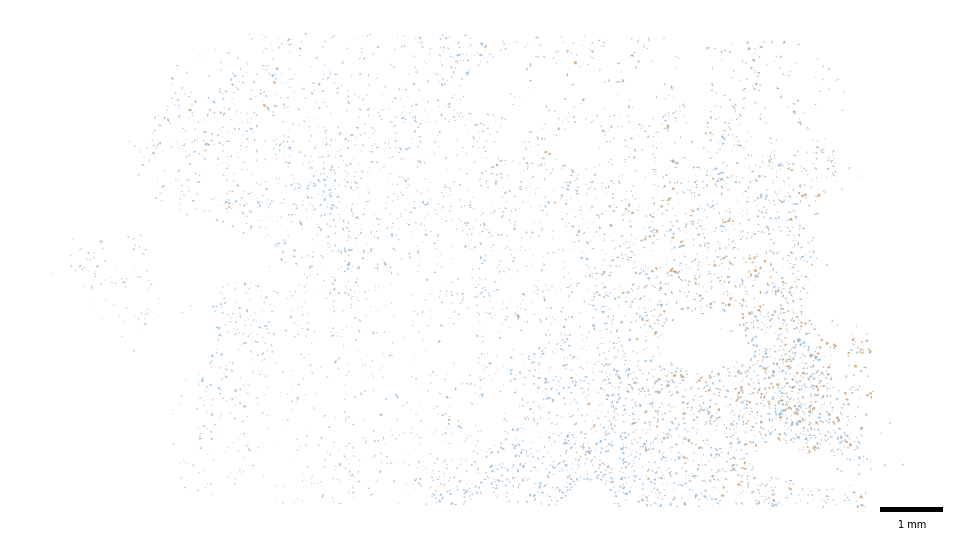

In [48]:
sp.pl.plot_polygons(
    adata,
    sample='SL001B',
    cluster_key='CombinedNameMergeImmune',
    clusters = ['Mono 1', 'TAM-BDM 3', 'TAM-BDM 4','MES-like 6','MES-like 8'],

    show_axis=False,
    palette=palette,
    figsize=(10,10),
    alpha=0.8,
    facecolor=(1,1,1),
    annotate=False,
    area_min_size=50,
    fontsize=12,
    
)

INFO:root:First filter, 7785 cells left
INFO:root:Selecting cells in zoom area
INFO:root:Zoom filter, 196 cells left
/home/alejandro/miniconda3/envs/py39/lib/python3.9/site-packages/geopandas/plotting.py:695: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(
/home/alejandro/miniconda3/envs/py39/lib/python3.9/site-packages/geopandas/plotting.py:695: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


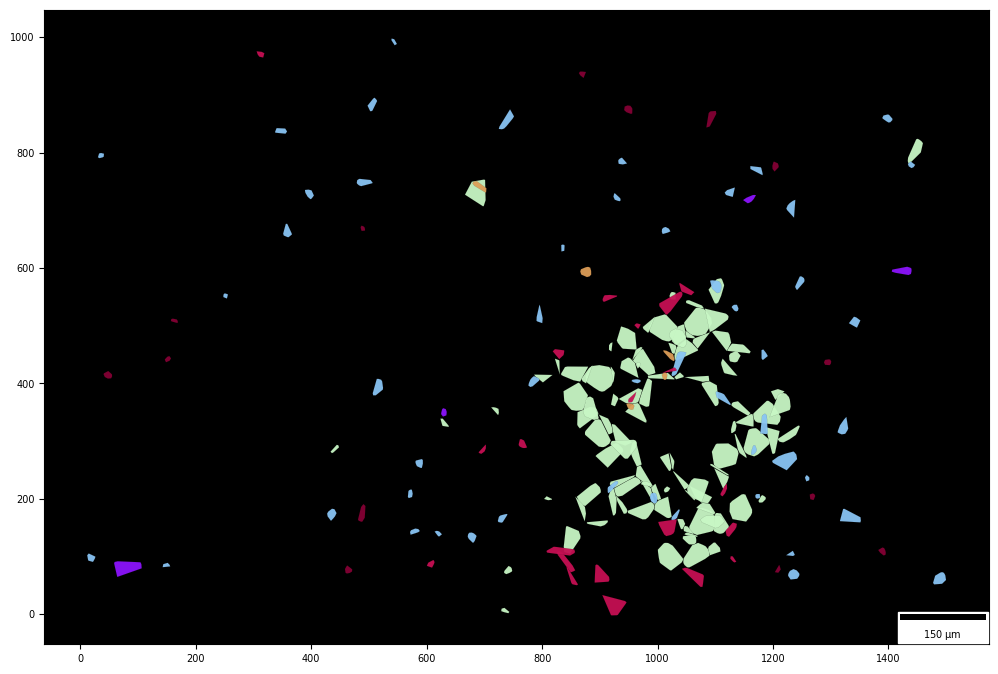

In [17]:
sp.pl.plot_polygons(
    adata,
    sample='SL001B',
    cluster_key='CombinedNameMergeImmune',
    clusters = ['Mono 1', 'TAM-BDM 3', 'TAM-BDM 4','MES-like 6','MES-like 8', 'Endothelial 1', 'Mural cell 1'],
    
    xlim=(3500,5000),
    ylim=(1800,2800),
    show_axis=True,
    palette=palette,
    figsize=(10,10),
    alpha=0.95,
    facecolor=(0,0,0),
    annotate=False,
    #annotation_loc={'TAM-MDM 3':5},
    area_min_size=50,
    fontsize=12,
    
    save=True,
    savepath='figures/SL001B_Mono.svg',
    
)

INFO:root:First filter, 150196 cells left
INFO:root:Selecting cells in zoom area
INFO:root:Zoom filter, 3913 cells left


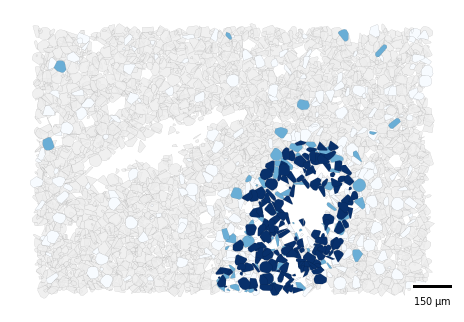

In [27]:


fig,ax = plt.subplots(1,1 ,figsize=(5,5))
xlim=(3500,5000)
ylim=(1800,2800)

sp.pl.plot_polygons_expression(
    adata,
    sample='SL001B',
    genes=['HMOX1'],
    cmap='Blues',
    #cluster_key='CombinedNameMerge',
    #clusters= ['MES-like 1', 'MES-like 2', 'MES-like 3', 'MES-like 4', 'MES-like 5', 'MES-like 6', 'MES-like 7', 'MES-like 8'], #[45,76],
    xlim=xlim,
    ylim=ylim,
    alpha=1,
    show_axis=False,
    #figsize=(5,5),
    mquant=0.999,
    ax = ax
    #save=True,
    #savepath='figures/SL035B_zoom.svg',
)

'''sp.pl.plot_polygons(
    adata,
    sample='SL035B',
    cluster_key='CombinedNameMergeTemp',
    clusters=['Mural','Endothelial'], #[45,76],
    xlim=xlim,
    ylim=ylim,
    alpha=0.9,
    show_axis=True,
    palette= {'Endothelial':'#8c14fc',  'Mural': '#8c14fc'},
    ax=ax,
)'''

plt.savefig('figures/HMOX1.svg',dpi=300, format='svg', transparent=True,bbox_inches='tight')


INFO:root:First filter, 150196 cells left
INFO:root:Selecting cells in zoom area
INFO:root:Zoom filter, 3913 cells left


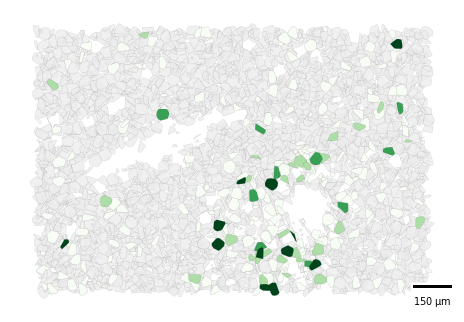

In [26]:


fig,ax = plt.subplots(1,1 ,figsize=(5,5))
xlim=(3500,5000)
ylim=(1800,2800)

sp.pl.plot_polygons_expression(
    adata,
    sample='SL001B',
    genes=['CD93'],
    cmap='Greens',
    #cluster_key='CombinedNameMerge',
    #clusters= ['MES-like 1', 'MES-like 2', 'MES-like 3', 'MES-like 4', 'MES-like 5', 'MES-like 6', 'MES-like 7', 'MES-like 8'], #[45,76],
    xlim=xlim,
    ylim=ylim,
    alpha=1,
    show_axis=False,
    #figsize=(5,5),
    mquant=0.999,
    ax = ax
    #save=True,
    #savepath='figures/SL035B_zoom.svg',
)

'''sp.pl.plot_polygons(
    adata,
    sample='SL035B',
    cluster_key='CombinedNameMergeTemp',
    clusters=['Mural','Endothelial'], #[45,76],
    xlim=xlim,
    ylim=ylim,
    alpha=0.9,
    show_axis=True,
    palette= {'Endothelial':'#8c14fc',  'Mural': '#8c14fc'},
    ax=ax,
)'''

plt.savefig('figures/CD93.svg',dpi=300, format='svg', transparent=True,bbox_inches='tight')


2023-07-14 12:10:33,480 - INFO - First filter, 150196 cells left
2023-07-14 12:10:35,191 - INFO - Selecting cells in zoom area
2023-07-14 12:10:38,983 - INFO - Zoom filter, 3913 cells left


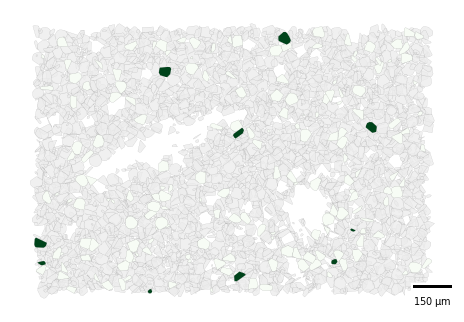

In [39]:


fig,ax = plt.subplots(1,1 ,figsize=(5,5))
xlim=(3500,5000)
ylim=(1800,2800)

sp.pl.plot_polygons_expression(
    adata,
    sample='SL001B',
    genes=['CCR2'],
    cmap='Greens',
    #cluster_key='CombinedNameMerge',
    #clusters= ['MES-like 1', 'MES-like 2', 'MES-like 3', 'MES-like 4', 'MES-like 5', 'MES-like 6', 'MES-like 7', 'MES-like 8'], #[45,76],
    xlim=xlim,
    ylim=ylim,
    alpha=1,
    show_axis=False,
    #figsize=(5,5),
    mquant=0.999999,
    ax = ax
    #save=True,
    #savepath='figures/SL035B_zoom.svg',
)

'''sp.pl.plot_polygons(
    adata,
    sample='SL035B',
    cluster_key='CombinedNameMergeTemp',
    clusters=['Mural','Endothelial'], #[45,76],
    xlim=xlim,
    ylim=ylim,
    alpha=0.9,
    show_axis=True,
    palette= {'Endothelial':'#8c14fc',  'Mural': '#8c14fc'},
    ax=ax,
)'''

plt.savefig('figures/CD93.svg',dpi=300, format='svg', transparent=True,bbox_inches='tight')


In [35]:
from FISHscale.utils.dataset import Dataset
import zarr

INFO:root:Please install "BoneFight" or its missing dependencies. Error message: No module named 'bone_fight'
INFO:root:Could not import Cellpose. Ignore if cell segmentation is not needed. Error: No module named 'cellpose'


# SL046C

2023-07-14 12:11:36,058 - INFO - First filter, 36446 cells left
2023-07-14 12:11:36,401 - INFO - Zoom filter, 36446 cells left


/home/alejandro/miniconda3/envs/py39/lib/python3.9/site-packages/geopandas/plotting.py:695: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


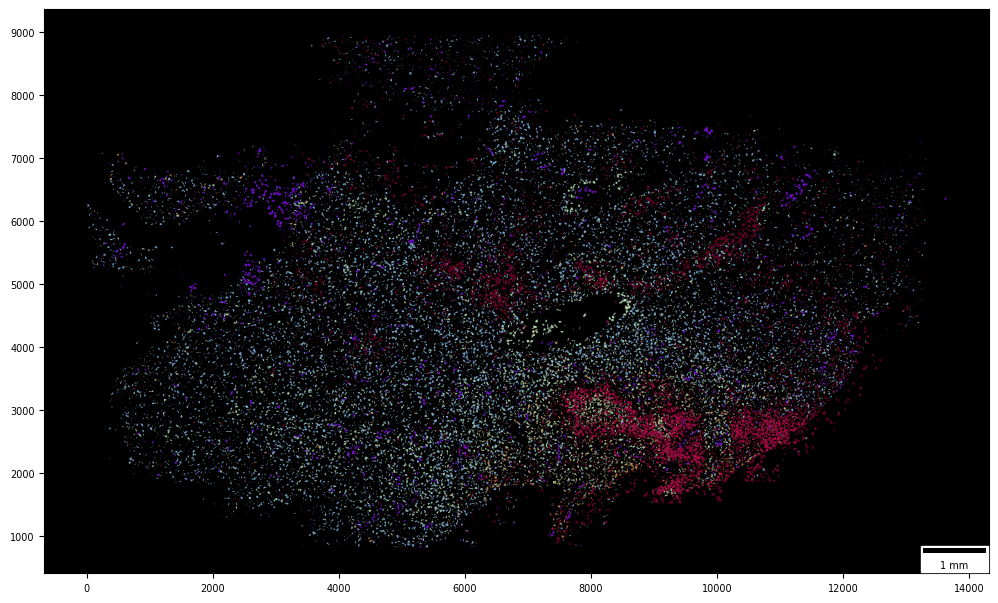

In [41]:
sp.pl.plot_polygons(
    adata,
    sample='SL046C',
    cluster_key='CombinedNameMergeImmune',
    clusters = ['Mono 1', 'TAM-BDM 3', 'TAM-BDM 4','MES-like 6','MES-like 8', 'Endothelial'],
    show_axis=True,
    palette=palette,
    figsize=(10,10),
    alpha=0.8,
    facecolor=(0,0,0),
    fontsize=12,
    
    #save=True,
    #savepath='figures/SL046C_Mono.svg',
    
)

In [53]:
import pandas as pd
adata.obs['CombinedNameMergeImmune'] = pd.Categorical(['Mural' if x.count('Mural') else x for x in adata.obs.CombinedNameMergeImmune])
adata.obs['CombinedNameMergeImmune'] = pd.Categorical(['Endothelial' if x.count('Endothelial') else x for x in adata.obs.CombinedNameMergeImmune])

2023-07-14 18:00:11,936 - INFO - First filter, 31923 cells left
2023-07-14 18:00:12,250 - INFO - Selecting cells in zoom area
2023-07-14 18:00:13,389 - INFO - Zoom filter, 8307 cells left


/home/alejandro/miniconda3/envs/py39/lib/python3.9/site-packages/geopandas/plotting.py:695: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


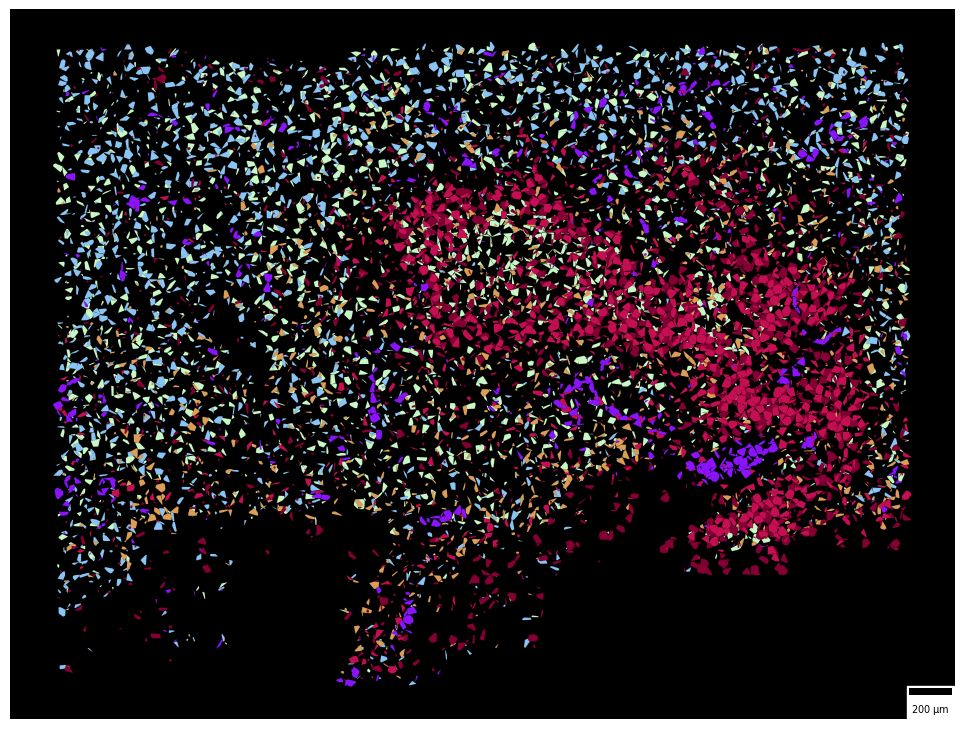

In [58]:
sp.pl.plot_polygons(
    adata,
    sample='SL046C',
    cluster_key='CombinedNameMergeImmune',
    clusters = ['Mono 1','TAM-BDM 3', 'TAM-BDM 4','MES-like 6','MES-like 8', 'Endothelial', 'Mural'], 
    xlim=(6000,10000),
    ylim=(1000,4000),

    show_axis=False,
    palette=palette,
    figsize=(10,10),
    alpha=1,
    facecolor=(0,0,0),

    area_min_size=50,
    fontsize=12,
    annotation_rotation=-90,
    annotation_text_offset=(50,-300),
    save=True,
    savepath='figures/SL046C_Mono.svg',
    
)

2023-07-14 18:46:31,771 - INFO - First filter, 31923 cells left
2023-07-14 18:46:32,071 - INFO - Selecting cells in zoom area
2023-07-14 18:46:33,195 - INFO - Zoom filter, 8307 cells left


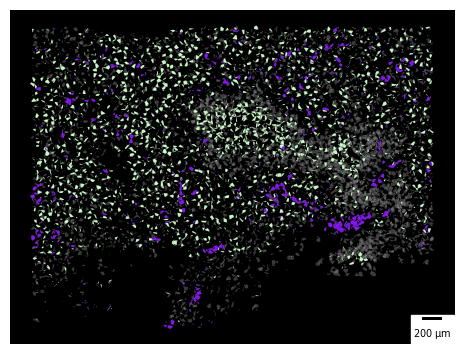

2023-07-14 18:46:35,852 - INFO - First filter, 31923 cells left
2023-07-14 18:46:36,144 - INFO - Selecting cells in zoom area
2023-07-14 18:46:37,284 - INFO - Zoom filter, 8307 cells left


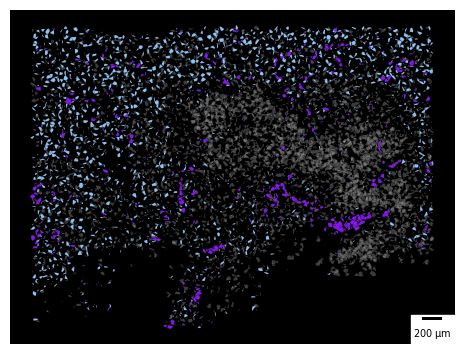

2023-07-14 18:46:39,554 - INFO - First filter, 31923 cells left
2023-07-14 18:46:39,849 - INFO - Selecting cells in zoom area
2023-07-14 18:46:41,002 - INFO - Zoom filter, 8307 cells left


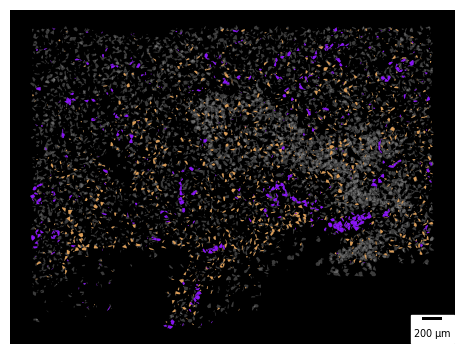

2023-07-14 18:46:43,680 - INFO - First filter, 31923 cells left
2023-07-14 18:46:44,002 - INFO - Selecting cells in zoom area
2023-07-14 18:46:45,134 - INFO - Zoom filter, 8307 cells left


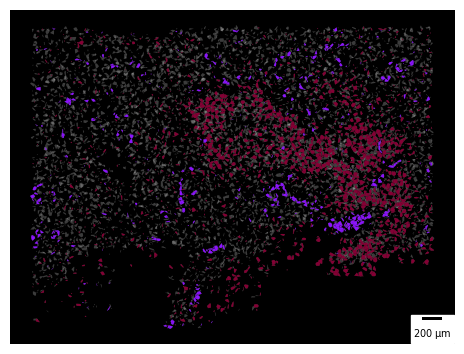

In [64]:
for c in ['Mono 1','TAM-BDM 3', 'TAM-BDM 4','MES-like 6']:
    sp.pl.plot_polygons(
        adata,
        sample='SL046C',
        cluster_key='CombinedNameMergeImmune',
        clusters=[c, 'Endothelial', 'Mural'],
        grey_clusters = ['Mono 1','TAM-BDM 3', 'TAM-BDM 4','MES-like 6','MES-like 8', 'Endothelial', 'Mural'], 
        xlim=(6000,10000),
        ylim=(1000,4000),

        show_axis=False,
        palette=palette,
        figsize=(5,5),
        alpha=1,
        alpha_gray=0.25,
        facecolor=(0,0,0),

        area_min_size=50,
        fontsize=12,
        annotation_rotation=-90,
        annotation_text_offset=(50,-300),
        save=True,
        savepath=f'figures/SL046C_{c}.svg',

    )

In [119]:
sadata = adata[adata.obs.Sample == 'SL046C']
#sc.pp.normalize_total(sadata)
#sc.pp.log1p(sadata)

2023-07-15 15:42:21,893 - INFO - First filter, 290743 cells left
2023-07-15 15:42:24,253 - INFO - Selecting cells in zoom area
2023-07-15 15:42:33,197 - INFO - Zoom filter, 48127 cells left


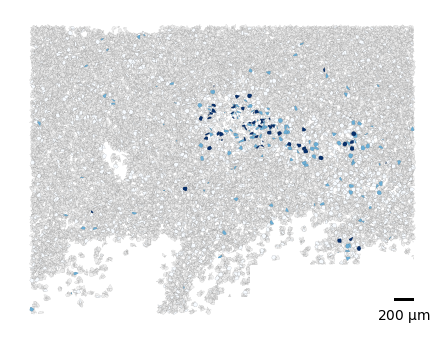

In [125]:
fig,ax = plt.subplots(1,1 ,figsize=(5,5))
xlim=(6000,10000)
ylim=(1000,4000)

sp.pl.plot_polygons_expression(
    sadata,
    sample='SL046C',
    genes=['ATF3'],
    cmap='Blues',
    #cluster_key='CombinedNameMerge',
    #clusters= ['MES-like 1', 'MES-like 2', 'MES-like 3', 'MES-like 4', 'MES-like 5', 'MES-like 6', 'MES-like 7', 'MES-like 8'], #[45,76],
    xlim=xlim,
    ylim=ylim,
    alpha=1,
    show_axis=False,
    #figsize=(5,5),
    mquant=0.9999,
    bgval=0,
    ax = ax
    #save=True,
    #savepath='figures/SL035B_zoom.svg',
)

'''sp.pl.plot_polygons(
    adata,
    sample='SL035B',
    cluster_key='CombinedNameMergeTemp',
    clusters=['Mural','Endothelial'], #[45,76],
    xlim=xlim,
    ylim=ylim,
    alpha=0.9,
    show_axis=True,
    palette= {'Endothelial':'#8c14fc',  'Mural': '#8c14fc'},
    ax=ax,
)'''

plt.savefig('figures/HMOX1_SL046C.svg',dpi=300, format='svg', transparent=True,bbox_inches='tight')


In [8]:
from FISHscale.utils.dataset import Dataset
import zarr

DS = Dataset('/wsfish/glioblastoma/EEL/Phase1/Analysis/JJEXP20220505_EEL_SL046C_S2/JJEXP20220505_EEL_SL046C_S2_RNA_transformed_assigned.parquet',
             gene_label='decoded_genes',
             pixel_size='0.27 micrometers',
             reparse=True,
            )

'''DS.color_dict['VEGFA'] = np.array((227, 61, 148)) / 255
DS.color_dict['FTL'] = np.array((255, 255, 204)) / 255
DS.color_dict['IGFBP5'] = np.array((210, 77, 87)) / 255'''


from skimage import img_as_bool
from skimage.transform import rescale
img = zarr.load('/datc/sl/fish_rawdata/JJEXP20220505_EEL_SL046C_S2/fresh_tissue/segmentation/image_segmented_labels.zarr/segmented_labels_image/')
#img = np.flip(img, axis=0)
img[img >0] = 1

img_d = rescale(img, 0.27, anti_aliasing=False)
img_d[img_d >0] = 1
img_d = img_as_bool(img_d)
import matplotlib
DS.color_dict['HMOX1'] = (0.09999999999999998, 1.0, 0.7081081081081079) # green
DS.color_dict['CD93'] = (0.8851351351351351, 0.5, 1.0) #
DS.color_dict['SPP1'] =  matplotlib.colors.to_rgb('#fbc093')
DS.color_dict['ISG15'] = matplotlib.colors.to_rgb('#89c4f4') # blue
DS.color_dict['CCL2'] = matplotlib.colors.to_rgb('#89c4f4') # blue pink
DS.color_dict['FTL'] = matplotlib.colors.to_rgb('#e88474')

DS.color_dict['VEGFA'] = matplotlib.colors.to_rgb('#e76d89')
DS.color_dict['CD14'] = matplotlib.colors.to_rgb('#eeecf3')

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1324/1324 [00:18<00:00, 71.46it/s]


2023-07-24 17:07:57,155 - INFO -     Loaded: JJEXP20220505_EEL_SL046C_S2_RNA_transformed_assigned


In [20]:
DS.color_dict['IFIT2'] =  matplotlib.colors.to_rgb('#ff4c30')#matplotlib.colors.to_rgb('#e33d94')
DS.color_dict['IFIT3'] =  matplotlib.colors.to_rgb('#c8f7c5')


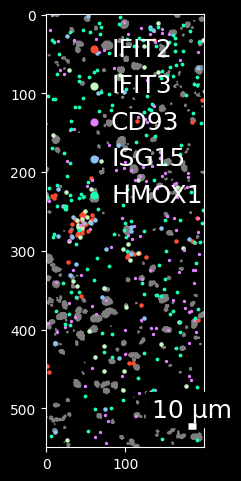

In [21]:
DS.scatter_plot(
    genes,
    s=sizes,
    ax_scale_factor=200,
    show_axes=True,
    show_legend=True,
    view = v,
    image=img_zoom,
    invert_yaxis=False,
    reset_xy=True,
)

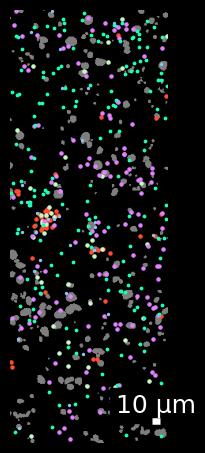

In [34]:
#v =  [[7800,2500],[8100,3300]]
v = [[7900,2800],[8100,3350]]
scale_factor = 1#0.27*4.5
img_zoom = img_d[int(v[0][1]*scale_factor):int(v[1][1]*scale_factor),int(v[0][0]*scale_factor):int(v[1][0]*scale_factor)]

sizes = [5, 5,2,5,3] 
genes = ['IFIT2','IFIT3','ISG15','CD93','HMOX1']
DS.scatter_plot(
    genes,
    s=sizes,
    ax_scale_factor=200,
    show_axes=False,
    show_legend=False,
    view = v,
    image=img_zoom,
    invert_yaxis=False,
    reset_xy=True,
    save=True,
    save_name='figures/SL046C_dotsIFIT.svg'
)

In [76]:
matplotlib.colors.rgb2hex(np.array(DS.color_dict['HMOX1']))

'#19ffb5'

In [32]:
DS.color_dict['VCAN'] = matplotlib.colors.to_rgb('#ffff9f') # blue
DS.color_dict['S100A9'] = matplotlib.colors.to_rgb('#89c4f4') # blue

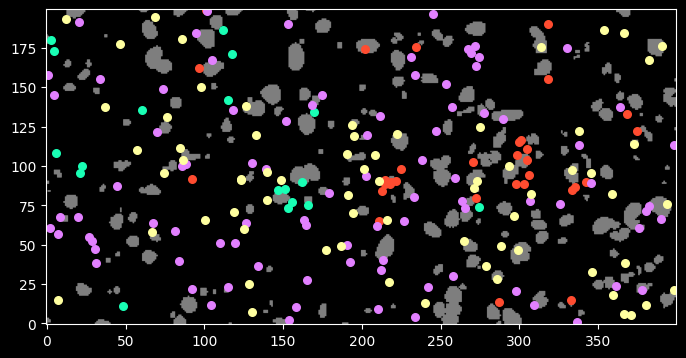

In [33]:
#v =  [[7800,2500],[8100,3300]]
v = [[8100,3000],[8500,3200]]
scale_factor = 1#0.27*4.5
img_zoom = img_d[int(v[0][1]*scale_factor):int(v[1][1]*scale_factor),int(v[0][0]*scale_factor):int(v[1][0]*scale_factor)]
DS.color_dict['IL1B'] = (0.09999999999999998, 1.0, 0.7081081081081079)
sizes = [30, 30,30,30,30] 
genes = ['IFIT2','IL1B','CD93','VCAN']
DS.scatter_plot(
    genes,
    s=sizes,
    ax_scale_factor=400,
    show_axes=True,
    show_legend=False,
    view = v,
    image=img_zoom,
    scalebar=False,
    invert_yaxis=True,
    reset_xy=True,
    save=True,
    save_name='figures/SL046C_dotsIL1B.svg'
)

In [ ]:
adata.obs['CombinedNameMergeImmune'].cat.categories

In [ ]:
#Compound figure

fig,ax = plt.subplots(ncols=1,nrows=1, figsize=(10,10))
DS.color_dict['ISG15'] = matplotlib.colors.to_rgb('#ffff9f')
[[7500,2500],[8800,3500]]
xlim=(7500,8800)
ylim= (2500,3500)

#xlim=(5000,12000)
#ylim=(1000,4000)
sp.pl.plot_polygons(
    adata,
    sample='SL046C',
    cluster_key='CombinedNameMergeImmune',
    clusters = [
                'MES-like 6','MES-like 8',
                'AC-like 2',#'AC-like 4','AC-like 5','AC-like 6','AC-like 7','AC-like 8','TAM-MDM 2','TAM-MDM 3',
                #'MES-like 6','MES-like 8','MES-like 7','MES-like 5','MES-like 4','MES-like 3','MES-like 2','MES-like 1',
                #'AC-like 2', 'AC-like 4', 'AC-like 5',
                
                
               ],
    
    xlim=xlim,
    ylim=ylim,
    show_axis=False,
    palette=palette,
    figsize=(10,10),
    alpha=0.5,
    facecolor=(0,0,0),
    area_min_size=25,
    show_scalebar=False,
    #fontsize=12,
    #annotate=True,
    #annotation_loc={'Mono 1':10, 'TAM-MDM 3': 300},
    #annotation_rotation=-90,
    #annotation_text_offset=(50,-300),
    ax=ax
    #save=True,
    #savepath='figures/SL046C_Mono.svg',
    
)

v = [[xlim[0],ylim[0]], [xlim[1],ylim[1]]]
img_zoom = img_d[int(v[0][1]*scale_factor):int(v[1][1]*scale_factor),int(v[0][0]*scale_factor):int(v[1][0]*scale_factor)]

sizes = [20,10,10] 
genes = ['CCL2','ISG15','VEGFA']
DS.scatter_plot(
    genes,
    s=sizes,
    ax_scale_factor=200,
    show_axes=True,
    show_legend=False,
    view = v,
    image=img_zoom,
    invert_yaxis=True,
    reset_xy=True,
    ax=ax,
    scalebar=False,
    #save=True,
    #save_name='figures/SL046C_dots.svg'
)
#plt.savefig('figures/VEGFA_CCL2')

In [ ]:
matplotlib.colors.rgb2hex( (0.7, 0.0, 0.16545454545454605))



In [ ]:

xlim=(7000,7500)
ylim= (3000,3400)

v = [[xlim[0],ylim[0]], [xlim[1],ylim[1]]]
img_zoom = img_d[int(v[0][1]*scale_factor):int(v[1][1]*scale_factor),int(v[0][0]*scale_factor):int(v[1][0]*scale_factor)]

DS.color_dict['CD163'] = (0.7, 0.0, 0.16545454545454605)
DS.color_dict['MT1H'] = (0.8851351351351351, 0.5, 1.0)

DS.color_dict['HMOX1'] = (0.09999999999999998, 1.0, 0.7081081081081079) # green
DS.color_dict['SPP1'] =  matplotlib.colors.to_rgb('#fbc093')
DS.color_dict['ISG15'] = matplotlib.colors.to_rgb('#89c4f4') # blue
DS.color_dict['CCL2'] = matplotlib.colors.to_rgb('#89c4f4') # blue pink
DS.color_dict['FTL'] = matplotlib.colors.to_rgb('#e88474')

DS.color_dict['VEGFA'] = matplotlib.colors.to_rgb('#e76d89')
DS.color_dict['CD14'] = matplotlib.colors.to_rgb('#eeecf3')
DS.color_dict['TREM2'] = (0.09999999999999998, 1.0, 0.7081081081081079)

DS.color_dict['CD163'] =  matplotlib.colors.to_rgb('#ffff9f') 
DS.color_dict['MT1H'] = matplotlib.colors.to_rgb('#9f5afd') 


sizes = [10,2,1, 5] 
genes = ['CD163','MT1H','SPP1','TREM2']
DS.scatter_plot(
    genes,
    s=sizes,
    ax_scale_factor=300,
    show_axes=False,
    show_legend=False,
    view = v,
    image=img_zoom,
    invert_yaxis=True,
    reset_xy=True,
    scalebar=True,
    save=True,
    save_name='figures/SL046C_TAM-MDM3-4.svg'
)


In [ ]:

sizes = [10,2,.1, 5] 
genes = ['CD163']
DS.scatter_plot(
    genes,
    s=sizes,
    ax_scale_factor=200,
    show_axes=True,
    show_legend=False,
    view = v,
    image=img_zoom,
    invert_yaxis=True,
    reset_xy=True,
    scalebar=False,
    save=True,
    save_name='figures/SL046C_TAM-MDM3-4.svg'
)


# TAM-MDM 3/4

2023-07-14 22:39:12,883 - INFO - First filter, 31040 cells left
2023-07-14 22:39:13,182 - INFO - Zoom filter, 31040 cells left


/home/alejandro/miniconda3/envs/py39/lib/python3.9/site-packages/geopandas/plotting.py:695: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(
/home/alejandro/miniconda3/envs/py39/lib/python3.9/site-packages/geopandas/plotting.py:695: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(
/home/alejandro/miniconda3/envs/py39/lib/python3.9/site-packages/geopandas/plotting.py:695: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


0
0
0


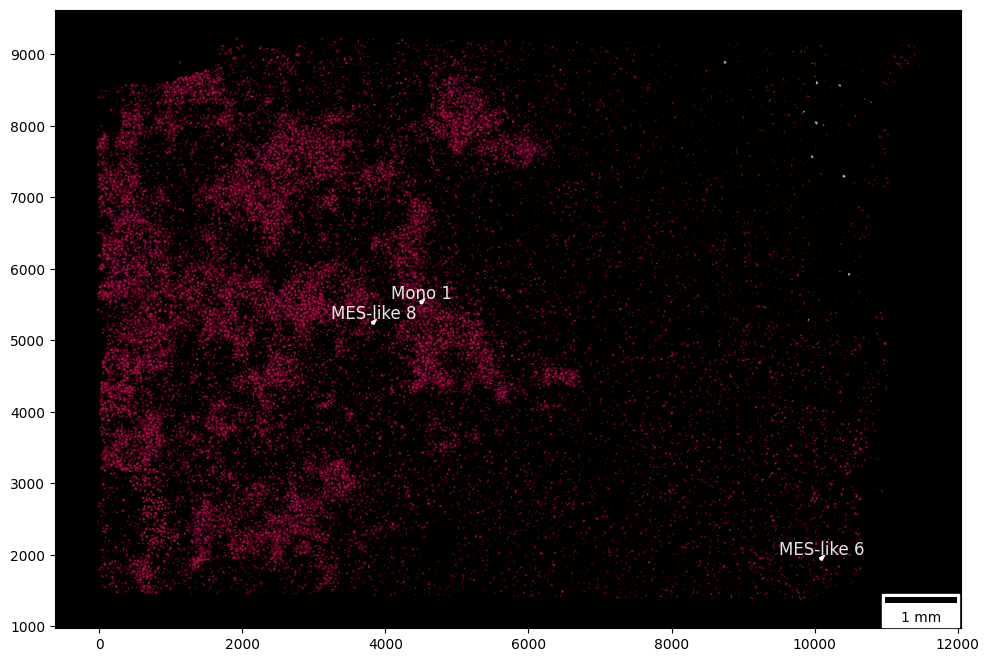

In [81]:
sp.pl.plot_polygons(
    adata,
    sample='SL061B',
    cluster_key='CombinedNameMergeImmune',
    clusters = ['Mono 1', 'TAM-MDM 3', 'TAM-MDM 4','MES-like 6','MES-like 8'],

    show_axis=True,
    palette=palette,
    figsize=(10,10),
    alpha=0.8,
    facecolor=(0,0,0),
    annotate=True,
    #annotation_loc={'Mono 1':10},
    area_min_size=50,
    fontsize=12,
    
    #save=True,
    #savepath='figures/SL046C_Mono.svg',
    
)

2023-07-14 22:41:30,830 - INFO - First filter, 62614 cells left
2023-07-14 22:41:31,344 - INFO - Selecting cells in zoom area
2023-07-14 22:41:32,808 - INFO - Zoom filter, 3995 cells left


/home/alejandro/miniconda3/envs/py39/lib/python3.9/site-packages/geopandas/plotting.py:695: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


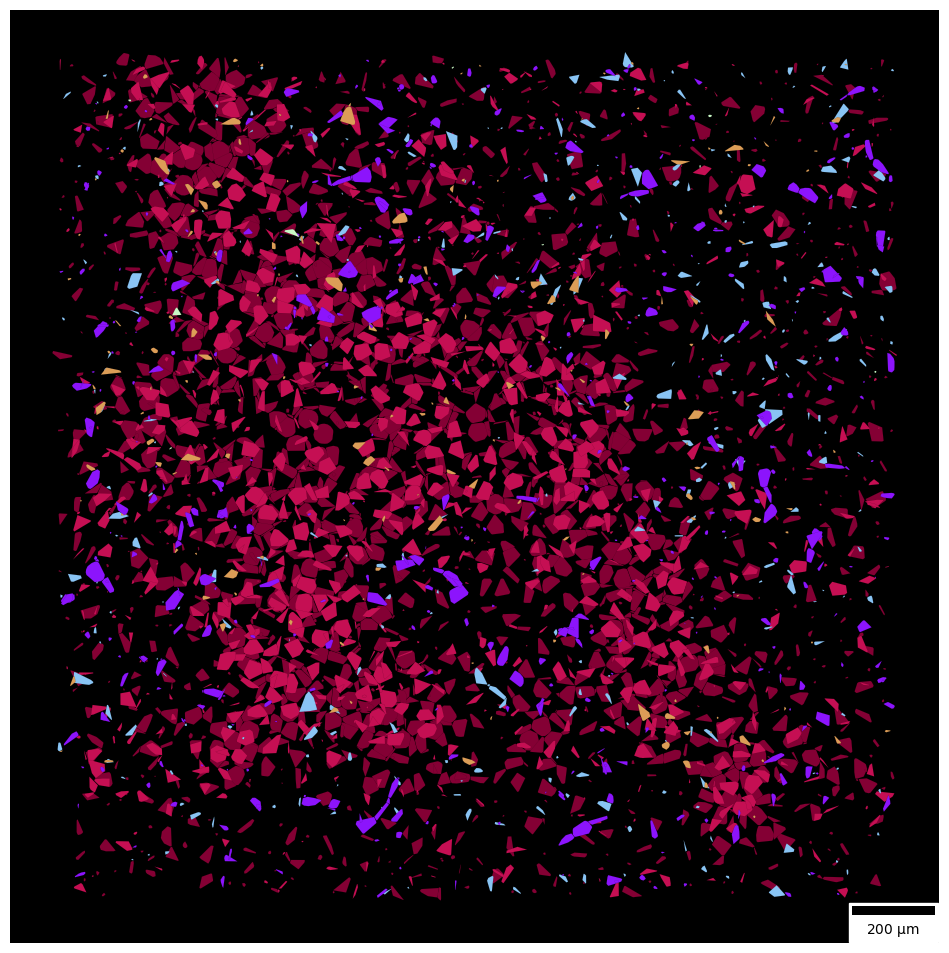

In [84]:
xlim = (4000,6000)
ylim = (4000,6000)
sp.pl.plot_polygons(
    adata,
    sample='SL061B',
    cluster_key='CombinedNameMergeImmune',
    clusters = ['MES-like 6','MES-like 8','TAM-BDM 3', 'TAM-BDM 4', 'Endothelial', 'Mural', 'Mono 1', ],
    xlim = xlim,
    ylim = ylim,
    show_axis=False,
    palette=palette,
    figsize=(10,10),
    alpha=1,
    facecolor=(0,0,0),
    area_min_size=5,
    fontsize=18,

    save=True,
    savepath='figures/SL061B_Mono.svg',
    
)

2023-07-14 22:54:59,579 - INFO - First filter, 367612 cells left
2023-07-14 22:55:03,147 - INFO - Selecting cells in zoom area
2023-07-14 22:55:11,739 - INFO - Zoom filter, 18567 cells left


/home/alejandro/miniconda3/envs/py39/lib/python3.9/site-packages/geopandas/plotting.py:695: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


"sp.pl.plot_polygons(\n    adata,\n    sample='SL035B',\n    cluster_key='CombinedNameMergeTemp',\n    clusters=['Mural','Endothelial'], #[45,76],\n    xlim=xlim,\n    ylim=ylim,\n    alpha=0.9,\n    show_axis=True,\n    palette= {'Endothelial':'#8c14fc',  'Mural': '#8c14fc'},\n    ax=ax,\n)"

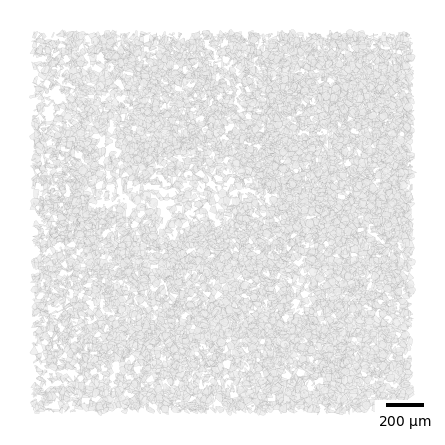

In [96]:


fig,ax = plt.subplots(1,1 ,figsize=(5,5))
xlim = (4000,6000)
ylim = (4000,6000)

sp.pl.plot_polygons_expression(
    adata,
    sample='SL061B',
    genes=['HMOX1'],
    cmap='Greens',
    #cluster_key='CombinedNameMerge',
    #clusters= ['MES-like 1', 'MES-like 2', 'MES-like 3', 'MES-like 4', 'MES-like 5', 'MES-like 6', 'MES-like 7', 'MES-like 8'], #[45,76],
    xlim=xlim,
    ylim=ylim,
    alpha=1,
    show_axis=False,
    #figsize=(5,5),
    mquant=0.9,
    ax = ax
    #save=True,
    #savepath='figures/SL035B_zoom.svg',
)

'''sp.pl.plot_polygons(
    adata,
    sample='SL035B',
    cluster_key='CombinedNameMergeTemp',
    clusters=['Mural','Endothelial'], #[45,76],
    xlim=xlim,
    ylim=ylim,
    alpha=0.9,
    show_axis=True,
    palette= {'Endothelial':'#8c14fc',  'Mural': '#8c14fc'},
    ax=ax,
)'''

#plt.savefig('figures/Nsvg',dpi=300, format='svg', transparent=True,bbox_inches='tight')

In [35]:
from FISHscale.utils.dataset import Dataset
DS = Dataset('/wsfish/glioblastoma/EEL/Phase1/Analysis/JJEXP20220725_EEL_SL061B_S1/JJEXP20220725_EEL_SL061B_S1_RNA_transformed_assigned.parquet',
             gene_label='decoded_genes',
             pixel_size='0.27 micrometers',
             reparse=True,
            )

'''DS.color_dict['VEGFA'] = np.array((227, 61, 148)) / 255
DS.color_dict['FTL'] = np.array((255, 255, 204)) / 255
DS.color_dict['IGFBP5'] = np.array((210, 77, 87)) / 255'''
import zarr

from skimage import img_as_bool
from skimage.transform import rescale
img = zarr.load('/date/sl/fish_rawdata/JJEXP20220725_EEL_SL061B_S1/fresh_tissue/segmentation/image_segmented_labels.zarr/segmented_labels_image/')
#img = np.flip(img, axis=0)
img[img >0] = 1

img_d = rescale(img, 0.27, anti_aliasing=False)
img_d[img_d >0] = 1
img_d = img_as_bool(img_d)
import matplotlib
DS.color_dict['HMOX1'] = (0.09999999999999998, 1.0, 0.7081081081081079) # green
DS.color_dict['CD93'] = (0.8851351351351351, 0.5, 1.0) #
DS.color_dict['SPP1'] =  matplotlib.colors.to_rgb('#fbc093')
DS.color_dict['ISG15'] = matplotlib.colors.to_rgb('#89c4f4') # blue
DS.color_dict['CCL2'] = matplotlib.colors.to_rgb('#89c4f4') # blue pink
DS.color_dict['FTL'] = matplotlib.colors.to_rgb('#e88474')

DS.color_dict['VEGFA'] = matplotlib.colors.to_rgb('#e76d89')
DS.color_dict['CD14'] = matplotlib.colors.to_rgb('#eeecf3')

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1324/1324 [00:25<00:00, 51.98it/s]


2023-07-24 17:51:25,127 - INFO -     Loaded: JJEXP20220725_EEL_SL061B_S1_RNA_transformed_assigned


In [36]:
DS.color_dict['CD74'] = matplotlib.colors.to_rgb('#89c4f4')
DS.color_dict['TREM2'] = (0.09999999999999998, 1.0, 0.7081081081081079) # green
DS.color_dict['CD163'] =  matplotlib.colors.to_rgb('#ffff9f') 
DS.color_dict['MT1H'] = matplotlib.colors.to_rgb('#9f5afd') 

In [37]:
matplotlib.colors.rgb2hex((0.30000000000000004, 0.6118181818181818, 1.0))

'#4d9cff'

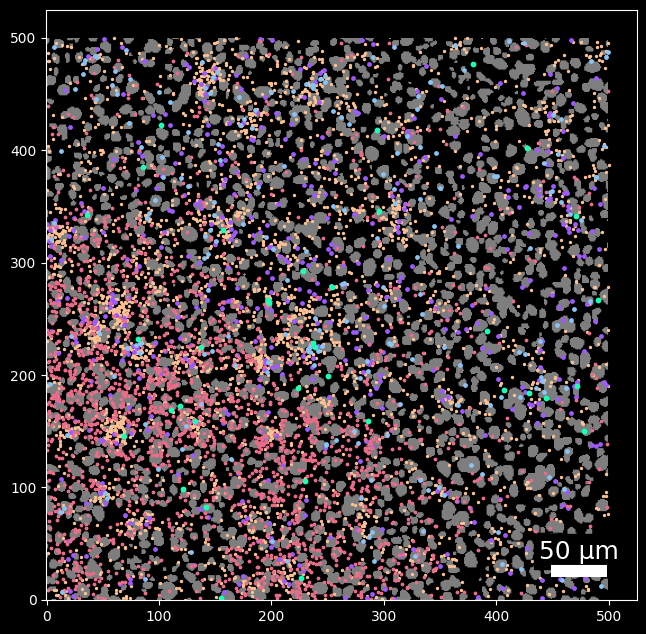

In [38]:
xlim = (5000,5500)
ylim = (5000,5500)
scale_factor = 1
v = [[xlim[0],ylim[0]], [xlim[1],ylim[1]]]
img_zoom = img_d[int(v[0][1]*scale_factor):int(v[1][1]*scale_factor),int(v[0][0]*scale_factor):int(v[1][0]*scale_factor)]


sizes = [2,6,3,6, 10,10] 
DS.color_dict['MT2A'] =  matplotlib.colors.to_rgb('#9f5afd') 
genes = ['SPP1', 'MT1H','VEGFA','CD74', 'TREM2']
DS.scatter_plot(
    genes,
    s=sizes,
    ax_scale_factor=300,
    show_axes=True,
    show_legend=False,
    view = v,
    image=img_zoom,
    invert_yaxis=True,
    reset_xy=True,
    scalebar=True,
    save=True,
    #save_name='figures/SL061B_dotsTAM-MDM3-4.svg'
)




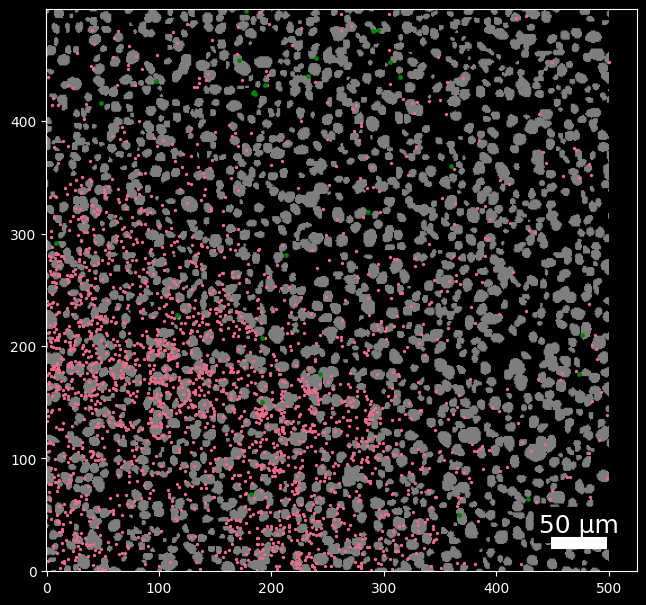

In [93]:
xlim = (5000,5500)
ylim = (5000,5500)
scale_factor = 1
v = [[xlim[0],ylim[0]], [xlim[1],ylim[1]]]
img_zoom = img_d[int(v[0][1]*scale_factor):int(v[1][1]*scale_factor),int(v[0][0]*scale_factor):int(v[1][0]*scale_factor)]


sizes = [2,6,3,6, 10,10] 
genes = ['VEGFA', 'IL1B']
DS.scatter_plot(
    genes,
    s=sizes,
    ax_scale_factor=300,
    show_axes=True,
    show_legend=False,
    view = v,
    image=img_zoom,
    invert_yaxis=True,
    reset_xy=True,
    scalebar=True,
    save=True,
    #save_name='figures/SL061B_dotsTAM-MDM3-4.svg'
)


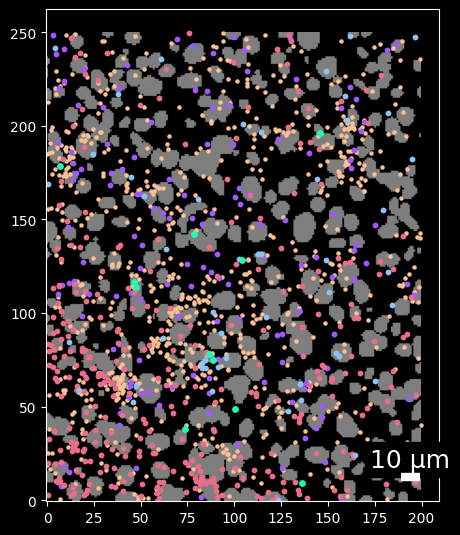

In [39]:
xlim = (5150,5350)
ylim = (5150,5400)
scale_factor = 1
v = [[xlim[0],ylim[0]], [xlim[1],ylim[1]]]
img_zoom = img_d[int(v[0][1]*scale_factor):int(v[1][1]*scale_factor),int(v[0][0]*scale_factor):int(v[1][0]*scale_factor)]


sizes = [5,10,10,10, 15,15] 
genes = ['SPP1', 'MT1H','VEGFA','CD74', 'TREM2']
DS.scatter_plot(
    genes,
    s=sizes,
    ax_scale_factor=500,
    show_axes=True,
    show_legend=False,
    view = v,
    image=img_zoom,
    invert_yaxis=True,
    reset_xy=True,
    scalebar=True,
    save=True,
    save_name='figures/SL061B_dotsTAM-MDM3-4_1.svg'
)